<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

Create an instance of the class [`CalibrationModel`](https://Rhys-McAlister.github.io/CalibrationCurve/core.html#calibrationmodel) by passing in the path to both your calibration data and your sample data. Next specify the name of your response variable and the nummber of test replicates you measured.

In [ ]:
sns.set_style("white")
sns.set_style("ticks")

In [1]:
#| echo: false
#| output: asis
show_doc(CalibrationModel)

---

[source](https://github.com/Rhys-McAlister/CalibrationCurve/blob/main/CalibrationCurve/core.py#L7){target="_blank" style="float:right; font-size:smaller"}

### CalibrationModel

>      CalibrationModel (data, response_variable, test_replicates)

Initialize self.  See help(type(self)) for accurate signature.

In [ ]:
def generate_test_data(slope, intercept):
        x = np.linspace(1, 10, num=5)
        y = intercept + x * slope
        df = pd.DataFrame({'concentration': x, "abs": y})
        return df

def generate_sample_data():
    x = np.array(['unknown1', 'unknown2'])
    y = np.array([13.75, 20.50])
    df = pd.DataFrame({'sample': x, "abs": y})
    df = df.set_index('sample')
    return df


test_data = generate_test_data(3, 4)
sample_data = generate_sample_data()

In [ ]:
cal = CalibrationModel(data = test_data, response_variable = "abs", test_replicates = 1)
cal.fit_model()

Calibration curve of abs versus concentration
R2 = 1.0
Slope = 3.000000000000001
Intercept = 3.9999999999999964
Uncertainity = 6.662313258790483e-15


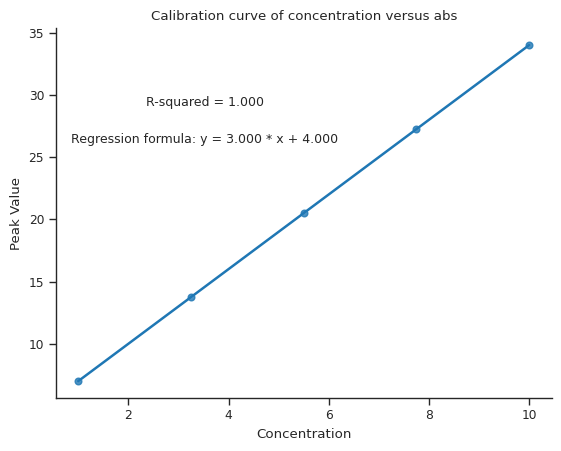

/home/rhysmcalister/mambaforge/envs/myenv/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    abs   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.931e+31
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           3.82e-48
Time:                        11:55:36   Log-Likelihood:                 162.17
No. Observations:                   5   AIC:                            -320.3
Df Residuals:                       3   BIC:                            -321.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.0000   2.29e-15   1.75e+15      0.000       4.000       4.000
concentration     3.0000    3.6e-16   8.33e+15      0.000       3.000       3.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.640
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.176
Skew:                          -0.400   Prob(JB):                        0.916
Kurtosis:                       2.548   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
cal.summary()

## Tests

A couple of quick tests to make sure nothing is broken. 

In [ ]:
assert cal.inverse_prediction(13.75) == 3.25

In [ ]:
assert cal.inverse_prediction(20.5) == 5.5